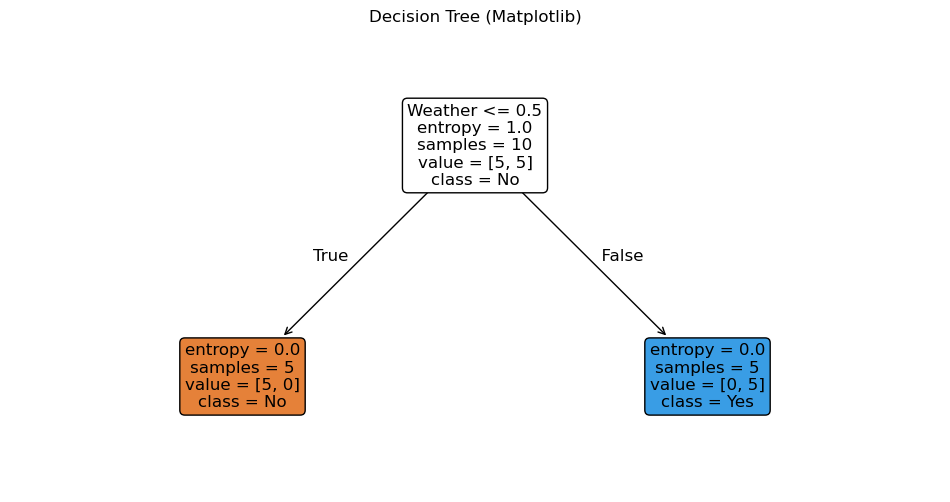

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny',
                'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy'],
    'Humidity': ['Normal', 'Normal', 'Normal', 'High', 'High',
                 'High', 'High', 'Low', 'Low', 'Low'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Weak', 'Strong',
             'Strong', 'Weak', 'Weak', 'Strong', 'Weak'],
    'Play': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

df['Weather'] = df['Weather'].map({'Sunny': 0, 'Rainy': 1})
df['Humidity'] = df['Humidity'].map({'Normal': 0, 'High': 1, 'Low': 2})
df['Wind'] = df['Wind'].map({'Weak': 0, 'Strong': 1})
df['Play'] = df['Play'].map({'No': 0, 'Yes': 1})


X = df[['Weather', 'Humidity', 'Wind']]
y = df['Play']


clf = DecisionTreeClassifier(criterion='entropy')  
clf.fit(X, y)


plt.figure(figsize=(12, 6))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree (Matplotlib)")
plt.show()


In [9]:
def manual_decision_tree_full(weather, humidity, wind):

    if humidity == 'Low':
        return 'Yes'  
    elif humidity == 'Normal':
       
        if wind == 'Weak' or wind == 'Strong':
            return 'No'
        else:
            return 'Unknown'
    elif humidity == 'High':
        if weather == 'Sunny':
            
            if wind == 'Weak' or wind == 'Strong':
                return 'No'
            else:
                return 'Unknown'
        elif weather == 'Rainy':
            if wind == 'Weak' or wind == 'Strong':
                return 'Yes'
            else:
                return 'Unknown'
        else:
            return 'Unknown'
    else:
        return 'Unknown'


print(manual_decision_tree_full('Sunny', 'Normal', 'Weak'))   # No
print(manual_decision_tree_full('Sunny', 'Normal', 'Strong')) # No
print(manual_decision_tree_full('Sunny', 'High', 'Weak'))     # No
print(manual_decision_tree_full('Rainy', 'High', 'Strong'))   # Yes
print(manual_decision_tree_full('Rainy', 'Low', 'Strong'))    # Yes


No
No
No
Yes
Yes


In [11]:
import pandas as pd

data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny',
                'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy'],
    'Humidity': ['Normal', 'Normal', 'Normal', 'High', 'High',
                 'High', 'High', 'Low', 'Low', 'Low'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Weak', 'Strong',
             'Strong', 'Weak', 'Weak', 'Strong', 'Weak'],
    'Play': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}
df = pd.DataFrame(data)


df['Predicted_Play_Full'] = df.apply(lambda row: manual_decision_tree_full(row['Weather'], row['Humidity'], row['Wind']), axis=1)
print(df[['Weather', 'Humidity', 'Wind', 'Play', 'Predicted_Play_Full']])



  Weather Humidity    Wind Play Predicted_Play_Full
0   Sunny   Normal    Weak   No                  No
1   Sunny   Normal    Weak   No                  No
2   Sunny   Normal  Strong   No                  No
3   Sunny     High    Weak   No                  No
4   Sunny     High  Strong   No                  No
5   Rainy     High  Strong  Yes                 Yes
6   Rainy     High    Weak  Yes                 Yes
7   Rainy      Low    Weak  Yes                 Yes
8   Rainy      Low  Strong  Yes                 Yes
9   Rainy      Low    Weak  Yes                 Yes


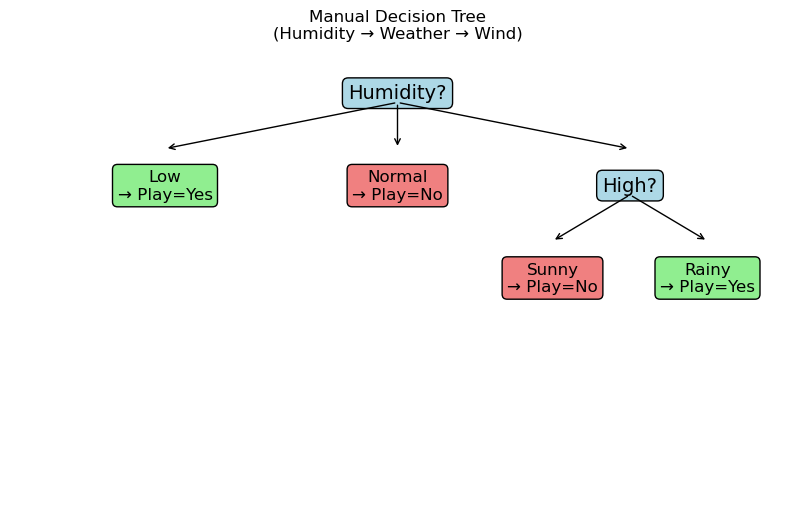

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def draw_manual_tree():
    fig, ax = plt.subplots(figsize=(10,6))
    ax.axis('off')

    
    ax.text(0.5, 0.9, "Humidity?", ha='center', va='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", fc="lightblue"))

    # Level 1 nodes: Humidity branches
    ax.text(0.2, 0.7, "Low\n→ Play=Yes", ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen"))
    ax.text(0.5, 0.7, "Normal\n→ Play=No", ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="lightcoral"))
    ax.text(0.8, 0.7, "High?", ha='center', va='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", fc="lightblue"))

    # Level 2 nodes under High Humidity (Weather)
    ax.text(0.7, 0.5, "Sunny\n→ Play=No", ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="lightcoral"))
    ax.text(0.9, 0.5, "Rainy\n→ Play=Yes", ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen"))

    # Draw arrows
    # Root to Humidity branches
    ax.annotate('', xy=(0.2,0.78), xytext=(0.5,0.88), arrowprops=dict(arrowstyle="->"))
    ax.annotate('', xy=(0.5,0.78), xytext=(0.5,0.88), arrowprops=dict(arrowstyle="->"))
    ax.annotate('', xy=(0.8,0.78), xytext=(0.5,0.88), arrowprops=dict(arrowstyle="->"))

    # High humidity to Weather branches
    ax.annotate('', xy=(0.7,0.58), xytext=(0.8,0.68), arrowprops=dict(arrowstyle="->"))
    ax.annotate('', xy=(0.9,0.58), xytext=(0.8,0.68), arrowprops=dict(arrowstyle="->"))

    plt.title("Manual Decision Tree\n(Humidity → Weather → Wind)")
    plt.show()

draw_manual_tree()
